In [2]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from collections import Counter

In [4]:
# Load the dataset
dataset = load_dataset('rcds/wikipedia-persons-masked', split="train")

Using custom data configuration rcds--wikipedia-persons-masked-43467242283bbbcd
Reusing dataset json (/home/nya/.cache/huggingface/datasets/rcds___json/rcds--wikipedia-persons-masked-43467242283bbbcd/0.0.0/a3e658c4731e59120d44081ac10bf85dc7e1388126b92338344ce9661907f253)


Using custom data configuration rcds--wikipedia-persons-masked-43467242283bbbcd
Reusing dataset json (/home/nya/.cache/huggingface/datasets/rcds___json/rcds--wikipedia-persons-masked-43467242283bbbcd/0.0.0/a3e658c4731e59120d44081ac10bf85dc7e1388126b92338344ce9661907f253)


  0%|          | 0/1 [00:00<?, ?it/s]

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

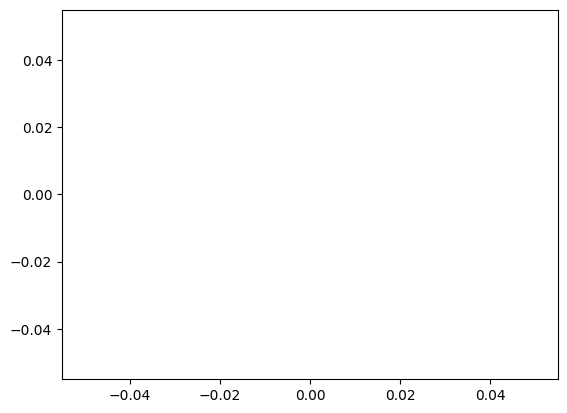

In [6]:
# Import necessary libraries
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Load the dataset
dataset = load_dataset('rcds/wikipedia-persons-masked')

# Assuming we are using the 'train' split of the dataset
train_dataset = dataset['train']

# Calculate the length of each text in the 'text' column
lengths = [len(text) for text in train_dataset['text']]

# Plot the lengths
sns.histplot(lengths, bins=50, kde=True)
plt.xlabel('Length of Text')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths')
plt.show()


In [3]:

# Function to tokenize text and count words
def word_count(text):
    words = word_tokenize(text)
    return len(words)

# Function to plot word frequency
def plot_word_freq(counter, title):
    labels, values = zip(*counter.items())
    indexes = range(len(labels))
    plt.figure(figsize=(10, 5))
    plt.bar(indexes, values)
    plt.xticks(indexes, labels, rotation='vertical')
    plt.title(title)
    plt.show()

# Function to plot word cloud
def wordcloud(counter, title):
    wc = WordCloud(width=800, height=400, max_words=200, background_color='white').generate_from_frequencies(counter)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Perform analysis
for column in ['text', 'sentences', 'paraphrased_sentences', 'masked_text_original', 'masked_text_paraphrased']:
    # Calculate average length in words and characters
    avg_char_len = dataset[column].map(len).mean()
    avg_word_len = dataset[column].map(word_count).mean()
    print(f'Average length of {column} in characters: {avg_char_len}')
    print(f'Average length of {column} in words: {avg_word_len}')

    # Plot word frequency and word cloud for 'text' column
    if column == 'text':
        word_counter = Counter(word_tokenize(' '.join(dataset[column])))
        plot_word_freq(word_counter.most_common(10), f'Most common words in {column}')
        wordcloud(word_counter, f'Word Cloud for {column}')

# Calculate average Levenshtein distance between 'sentences' and 'paraphrased_sentences'
# Not done here as it requires Levenshtein distance calculation which is not straightforward with HuggingFace datasets

# Compare length distribution of 'sentences' and 'paraphrased_sentences'
sentence_lengths = dataset['sentences'].map(word_count)
paraphrased_sentence_lengths = dataset['paraphrased_sentences'].map(word_count)
plt.figure(figsize=(10, 5))
sns.histplot(sentence_lengths, color='blue', label='Sentences')
sns.histplot(paraphrased_sentence_lengths, color='red', label='Paraphrased Sentences')
plt.xlabel('Length in words')
plt.title('Comparison of Length Distribution')
plt.legend()
plt.show()


Using custom data configuration rcds--wikipedia-persons-masked-43467242283bbbcd
Reusing dataset json (/home/nya/.cache/huggingface/datasets/rcds___json/rcds--wikipedia-persons-masked-43467242283bbbcd/0.0.0/a3e658c4731e59120d44081ac10bf85dc7e1388126b92338344ce9661907f253)


AttributeError: 'list' object has no attribute 'map'